In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from progressbar import ProgressBar



2022-12-14 02:10:37.354865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 02:10:37.651450: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-14 02:10:37.703625: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 02:10:37.703661: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [5]:
pbar = ProgressBar()

In [6]:
with open("billion-word-imputation/train_v2.txt/train_v2x", mode='r') as file:
    data = file.read()
    data = data.splitlines()
    data = data[::]

In [7]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
#print("Strong: ", tokenizer.word_index['strong'])
#print("And: ", tokenizer.word_index['and'])
#print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  6234
Word: ID
------------
<oov>:  1


In [8]:
input_sequences = []
for line in pbar(data):
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  21805


In [9]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   2, 115, 116], dtype=int32)

In [10]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=20, verbose=1)
#print model.summary()
print(model)

2022-12-14 02:10:53.215845: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-14 02:10:53.216274: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-14 02:10:53.216466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LeMaursPC): /proc/driver/nvidia/version does not exist
2022-12-14 02:10:53.218027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
682/682 [==============================] - 126s 181ms/step - loss: 7.5737 - accuracy: 0.0577
Epoch 2/20
682/682 [==============================] - 124s 181ms/step - loss: 6.9862 - accuracy: 0.0699
Epoch 3/20
682/682 [==============================] - 125s 183ms/step - loss: 6.6834 - accuracy: 0.0802
Epoch 4/20
682/682 [==============================] - 123s 181ms/step - loss: 6.3132 - accuracy: 0.0925
Epoch 5/20
682/682 [==============================] - 131s 192ms/step - loss: 5.8502 - accuracy: 0.1111
Epoch 6/20
682/682 [==============================] - 130s 191ms/step - loss: 5.3546 - accuracy: 0.1294
Epoch 7/20
682/682 [==============================] - 123s 180ms/step - loss: 4.8376 - accuracy: 0.1596
Epoch 8/20
682/682 [==============================] - 124s 182ms/step - loss: 4.3574 - accuracy: 0.2049
Epoch 9/20
682/682 [==============================] - 123s 181ms/step - loss: 3.9071 - accuracy: 0.2753
Epoch 10/20
682/682 [==============================] - 139s 204m

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 148, 100)          623400    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6234)              1876434   
                                                                 
Total params: 2,801,034
Trainable params: 2,801,034
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

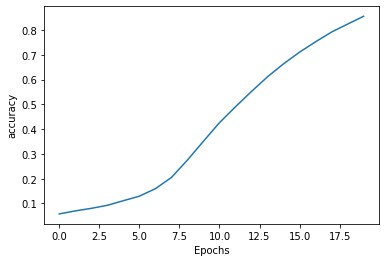

In [14]:
plot_graphs(history, 'accuracy')

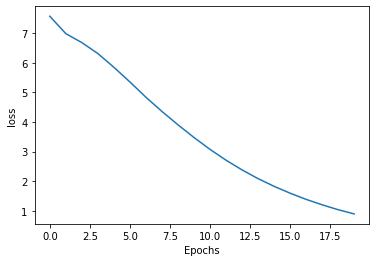

In [15]:
plot_graphs(history, 'loss')

In [42]:
seed_text = "there is"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0) > 0.5 #.astype('int32')
    output_word = ""
    for word, index in tokenizer.word_index.items():
        #print(word, index, predicted)
        if index == predicted.nonzero():
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)


there is  
